<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Plot-Raw-Data" data-toc-modified-id="Plot-Raw-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot Raw Data</a></span></li><li><span><a href="#Background-Subtraction" data-toc-modified-id="Background-Subtraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Background Subtraction</a></span></li><li><span><a href="#Background-Subtraction-Plots" data-toc-modified-id="Background-Subtraction-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Background Subtraction Plots</a></span></li><li><span><a href="#Backgroud-Subtraction,-Ion-Fragment-Correction,-and-Atmosphere-Correction" data-toc-modified-id="Backgroud-Subtraction,-Ion-Fragment-Correction,-and-Atmosphere-Correction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Background Subtraction, Ion Fragment Correction, and Atmosphere Correction</a></span></li><li><span><a href="#Plots-for-Ion-Fragment-Correction-and-Atmosphere-Correction" data-toc-modified-id="Plots-for-Ion-Fragment-Correction-and-Atmosphere-Correction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plots for Ion Fragment Correction and Atmosphere Correction

In [1]:
#Imports
import numpy as np
import pandas as pd 
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt

## Load Data

In [2]:
#Separating the heating data
def sepheating(file): 
    file1 = file[(file.Temperature >= 200) & (file.Temperature <=1200)]
    file_maxT = file1[file1.Temperature == np.amax(file1.Temperature)]
    file_heat = file1[file1.Time <= file_maxT['Time'].values[0]]
    return(file_heat)

In [3]:
#small Background
CBSG = pd.read_csv('Continuous_Background_MurchisonSmallGrain.csv', skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO_N2', 'S_O2', 'H2S', 'Ar','CO2', 'index'])
SGB = pd.read_csv('TvsTime_Background_MurchisonSmallGrain.csv', delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
CBSG['Temperature'] = np.interp(CBSG.Time, SGB.Time, SGB.T_K)- 273.15
CBSGheat = sepheating(CBSG)

#normal background
CBNG = pd.read_csv('Continuous_Blank_MurchisonNormalGrain.csv', skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO_N2', 'S_O2', 'H2S', 'Ar','CO2', 'index'])
NGB = pd.read_csv('TvsTime_Background_MurchisonNormalGrain.csv', delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
CBNG['Temperature'] = np.interp(CBNG.Time, NGB.Time, NGB.T_K)- 273.15
CBNGheat = sepheating(CBNG)

#small continuous
CSG = pd.read_csv('Continuous_Murchison_SmallGrains.csv', skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO_N2', 'S_O2', 'H2S', 'Ar','CO2', 'index'])
SG = pd.read_csv('TvsTime_Murchison_SmallGrains.csv', delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
CSG['Temperature'] = np.interp(CSG.Time, SG.Time, SG.T_K)- 273.15
CSGheat = sepheating(CSG)

#normal continuous
CNG = pd.read_csv('Continuous_Murchison_NormalGrain.csv', skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO_N2', 'S_O2', 'H2S', 'Ar','CO2', 'index'])
NG = pd.read_csv('TvsTime_Murchison_NormalGrain.csv', delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
CNG['Temperature'] = np.interp(CNG.Time, NG.Time, NG.T_K) - 273.15
CNGheat= sepheating(CNG)

# July Background data

Contin_July_Back = pd.read_csv('Background_Continuous.csv', skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO_N2', 'S_O2', 'H2S', 'Ar','CO2', 'index'])
July_Back_TvT = pd.read_csv('TvsTime.csv', delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
Contin_July_Back['Temperature'] = np.interp(Contin_July_Back.Time, July_Back_TvT.Time, July_Back_TvT.T_K)- 273.15
CJBheat = sepheating(Contin_July_Back)

# July Continuous data

Contin_July = pd.read_csv('Murchison1200C_continuous.csv', skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO_N2', 'S_O2', 'H2S', 'Ar','CO2', 'index'])
July_Cont_TvT = pd.read_csv('TvsTime_cont.csv',delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
Contin_July['Temperature'] = np.interp(Contin_July.Time, July_Cont_TvT.Time, July_Cont_TvT.T_K)- 273.15
CJheat = sepheating(Contin_July)



## Plot Raw Data

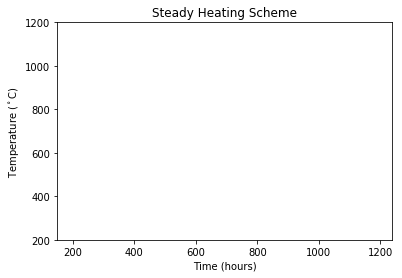

In [4]:
plt.plot(CSGheat.Temperature, CSGheat.Time, 'b', marker = 'o', markersize = 2)
plt.title('Steady Heating Scheme')
plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Time (hours)')
plt.ylim(200, 1200)
plt.show()

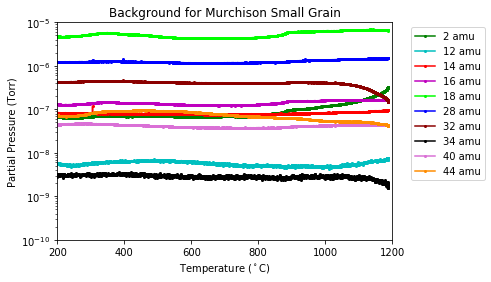

In [5]:
#Plot for Background Small Grain
plt.plot(CBSGheat.Temperature, CBSGheat.H2, 'g', marker = 'o', markersize = 2, label = '2 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.C, 'c', marker = 'o', markersize = 2, label = '12 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.N,'r', marker = 'o', markersize = 2, label = '14 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.CH4,'m', marker='o', markersize = 2, label = '16 amu' )
plt.plot(CBSGheat.Temperature, CBSGheat.H2O, color='lime', marker = 'o', markersize = 2, label = '18 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.CO_N2, 'b', marker = 'o', markersize = 2, label = '28 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.S_O2, 'darkred', marker = 'o', markersize = 2, label = '32 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.H2S, 'k', marker = 'o', markersize = 2, label = '34 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.Ar, color='orchid', marker = 'o', markersize = 2, label = '40 amu')
plt.plot(CBSGheat.Temperature, CBSGheat.CO2, color='darkorange', marker = 'o', markersize = 2, label = '44 amu')
plt.title('Background for Murchison Small Grain')
plt.ylabel('Partial Pressure (Torr)')
plt.yscale('log')
plt.ylim(1E-10, 1E-5)
plt.xlim(200, 1200)
plt.xlabel('Temperature ($^\circ$C)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('Background for Murchison Small Grain', dpi=1000)
plt.show()


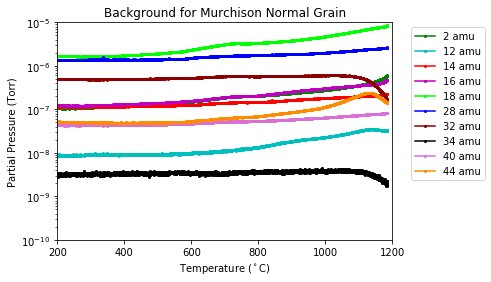

In [6]:
#Plot for Background Normal Grain
plt.plot(CBNGheat.Temperature, CBNGheat.H2, 'g', marker = 'o', markersize = 2, label = '2 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.C, 'c', marker = 'o', markersize = 2, label = '12 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.N,'r', marker = 'o', markersize = 2, label = '14 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.CH4,'m', marker='o', markersize = 2, label = '16 amu' )
plt.plot(CBNGheat.Temperature, CBNGheat.H2O, color='lime', marker = 'o', markersize = 2, label = '18 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.CO_N2, 'b', marker = 'o', markersize = 2, label = '28 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.S_O2, 'darkred', marker = 'o', markersize = 2, label = '32 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.H2S, 'k', marker = 'o', markersize = 2, label = '34 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.Ar, color='orchid', marker = 'o', markersize = 2, label = '40 amu')
plt.plot(CBNGheat.Temperature, CBNGheat.CO2, color='darkorange', marker = 'o', markersize = 2, label = '44 amu')
plt.title('Background for Murchison Normal Grain')
plt.ylabel('Partial Pressure (Torr)')
plt.yscale('log')
plt.ylim(1E-10, 1E-5)
plt.xlim(200, 1200)
plt.xlabel('Temperature ($^\circ$C)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('Background for Murchison Normal Grain', dpi=1000)
plt.show()


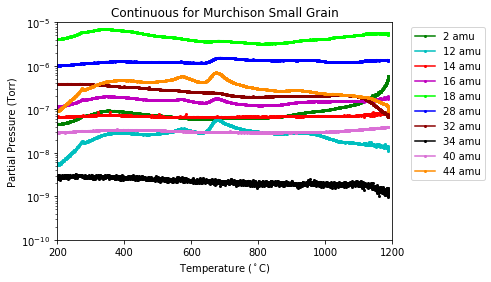

In [7]:
#Plot for Continuous small grain
plt.plot(CSGheat.Temperature, CSGheat.H2, 'g', marker = 'o', markersize = 2, label = '2 amu')
plt.plot(CSGheat.Temperature, CSGheat.C, 'c', marker = 'o', markersize = 2, label = '12 amu')
plt.plot(CSGheat.Temperature, CSGheat.N,'r', marker = 'o', markersize = 2, label = '14 amu')
plt.plot(CSGheat.Temperature, CSGheat.CH4,'m', marker='o', markersize = 2, label = '16 amu' )
plt.plot(CSGheat.Temperature, CSGheat.H2O, color='lime', marker = 'o', markersize = 2, label = '18 amu')
plt.plot(CSGheat.Temperature, CSGheat.CO_N2, 'b', marker = 'o', markersize = 2, label = '28 amu')
plt.plot(CSGheat.Temperature, CSGheat.S_O2, 'darkred', marker = 'o', markersize = 2, label = '32 amu')
plt.plot(CSGheat.Temperature, CSGheat.H2S, 'k', marker = 'o', markersize = 2, label = '34 amu')
plt.plot(CSGheat.Temperature, CSGheat.Ar, color='orchid', marker = 'o', markersize = 2, label = '40 amu')
plt.plot(CSGheat.Temperature, CSGheat.CO2, color='darkorange', marker = 'o', markersize = 2, label = '44 amu')
plt.title('Continuous for Murchison Small Grain')
plt.ylabel('Partial Pressure (Torr)')
plt.yscale('log')
plt.ylim(1E-10, 1E-5)
plt.xlim(200, 1200)
plt.xlabel('Temperature ($^\circ$C)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('Continuous for Murchison Small Grain', dpi=1000)
plt.show()


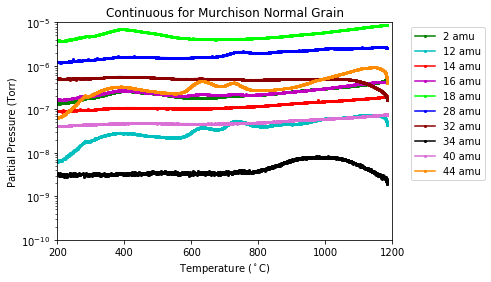

In [9]:
#Plot for Continuous Normal Grain
plt.plot(CNGheat.Temperature, CNGheat.H2, 'g', marker = 'o', markersize = 2, label = '2 amu')
plt.plot(CNGheat.Temperature, CNGheat.C, 'c', marker = 'o', markersize = 2, label = '12 amu')
plt.plot(CNGheat.Temperature, CNGheat.N,'r', marker = 'o', markersize = 2, label = '14 amu')
plt.plot(CNGheat.Temperature, CNGheat.CH4,'m', marker='o', markersize = 2, label = '16 amu' )
plt.plot(CNGheat.Temperature, CNGheat.H2O, color='lime', marker = 'o', markersize = 2, label = '18 amu')
plt.plot(CNGheat.Temperature, CNGheat.CO_N2, 'b', marker = 'o', markersize = 2, label = '28 amu')
plt.plot(CNGheat.Temperature, CNGheat.S_O2, 'darkred', marker = 'o', markersize = 2, label = '32 amu')
plt.plot(CNGheat.Temperature, CNGheat.H2S, 'k', marker = 'o', markersize = 2, label = '34 amu')
plt.plot(CNGheat.Temperature, CNGheat.Ar, color='orchid', marker = 'o', markersize = 2, label = '40 amu')
plt.plot(CNGheat.Temperature, CNGheat.CO2, color='darkorange', marker = 'o', markersize = 2, label = '44 amu')
plt.title('Continuous for Murchison Normal Grain')
plt.ylabel('Partial Pressure (Torr)')
plt.yscale('log')
plt.ylim(1E-10, 1E-5)
plt.xlim(200, 1200)
plt.xlabel('Temperature ($^\circ$C)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('Continuous for Murchison Normal Grain', dpi=1000)
plt.show()


## Background Subtraction

In [10]:
def interp_values(file, background, interp_data):
    background_H2interp = np.interp(file[interp_data], background[interp_data], background.H2)
    background_Cinterp = np.interp(file[interp_data], background[interp_data], background.C)
    background_Ninterp = np.interp(file[interp_data], background[interp_data], background.N)
    background_CH4interp = np.interp(file[interp_data], background[interp_data], background.CH4)
    background_H2Ointerp = np.interp(file[interp_data], background[interp_data], background.H2O)
    background_CO_N2interp = np.interp(file[interp_data], background[interp_data], background.CO_N2)
    background_S_O2interp = np.interp(file[interp_data], background[interp_data], background.S_O2)
    background_H2Sinterp = np.interp(file[interp_data], background[interp_data], background.H2S)
    background_Arinterp = np.interp(file[interp_data], background[interp_data], background.Ar)
    background_CO2interp = np.interp(file[interp_data], background[interp_data], background.CO2)
    d = {'Temperature': file.Temperature,'Time':file.Time, 'H2': background_H2interp, 'C': background_Cinterp, 'N': background_Ninterp, 'CH4': background_CH4interp, 'H2O': background_H2Ointerp, 'CO_N2': background_CO_N2interp, 'S_O2':background_S_O2interp, 'H2S':  background_H2Sinterp, 'Ar': background_Arinterp, 'CO2':background_CO2interp}
    partial_df = pd.DataFrame(data=d)
    return partial_df

B_interp_small = interp_values(CSGheat, CBSGheat, 'Temperature')
B_interp_normal = interp_values(CNGheat, CBNGheat, 'Temperature')



In [11]:
def PP_backsub(file, background, interp_data):
    background_H2interp = np.interp(file[interp_data], background[interp_data], background.H2)
    background_Cinterp = np.interp(file[interp_data], background[interp_data], background.C)
    background_Ninterp = np.interp(file[interp_data], background[interp_data], background.N)
    background_CH4interp = np.interp(file[interp_data], background[interp_data], background.CH4)
    background_H2Ointerp = np.interp(file[interp_data], background[interp_data], background.H2O)
    background_CO_N2interp = np.interp(file[interp_data], background[interp_data], background.CO_N2)
    background_S_O2interp = np.interp(file[interp_data], background[interp_data], background.S_O2)
    background_H2Sinterp = np.interp(file[interp_data], background[interp_data], background.H2S)
    background_Arinterp = np.interp(file[interp_data], background[interp_data], background.Ar)
    background_CO2interp = np.interp(file[interp_data], background[interp_data], background.CO2)
    H2P = file.H2 - background_H2interp
    H2P[H2P<0]=0
    CP = file.C - background_Cinterp
    CP[CP<0]=0
    NP = file.N - background_Ninterp
    NP[NP<0]=0
    CH4P = file.CH4 - background_CH4interp
    CH4P[CH4P<0]=0
    H2OP = file.H2O - background_H2Ointerp
    H2OP[H2OP<0]=0
    CO_N2P = file.CO_N2 - background_CO_N2interp
    CO_N2P[CO_N2P<0]=0
    S_O2P = file.S_O2 - background_S_O2interp
    S_O2P[S_O2P<0]=0
    H2SP = file.H2S - background_H2Sinterp
    H2SP[H2SP<0]=0
    ArP = file.Ar - background_Arinterp
    ArP[ArP<0]=0
    CO2P = file.CO2 - background_CO2interp
    CO2P[CO2P<0]=0
    d = {'Temperature': file.Temperature, 'Time':file.Time, 'H2': H2P, 'C': CP, 'N': NP, 'CH4': CH4P, 'H2O': H2OP, 'CO_N2': CO_N2P, 'S_O2': S_O2P, 'H2S': H2SP, 'Ar': ArP, 'CO2': CO2P}
    partial_df = pd.DataFrame(data=d)
    return partial_df

In [12]:
backsub_small = PP_backsub(CSGheat, B_interp_small, 'Temperature')
backsub_normal = PP_backsub(CNGheat, B_interp_normal, 'Temperature')

## Background Subtraction Plots

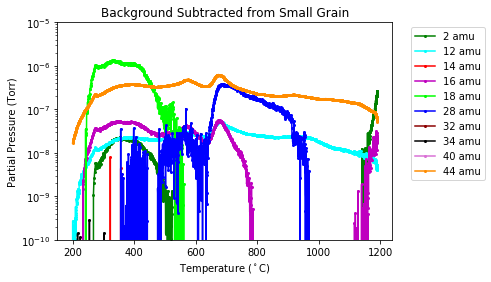

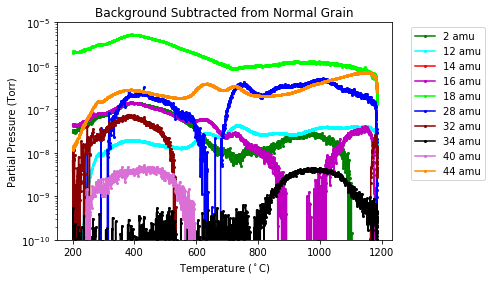

In [13]:
def plotbacksub_heat(file, xaxis, title, title2):
    fig, ax = plt.subplots()
    plt.plot(file[xaxis], file.H2, marker = 'o', markersize = 2,color = 'green', label = '2 amu')
    plt.plot(file[xaxis], file.C, marker = 'o', markersize = 2, color= 'cyan', label = '12 amu')
    plt.plot(file[xaxis], file.N, marker='o', markersize =2, color='red', label='14 amu') 
    plt.plot(file[xaxis], file.CH4, marker='o', markersize =2, color='m', label = '16 amu')
    plt.plot(file[xaxis], file.H2O, marker = 'o', markersize = 2, color='lime', label = '18 amu')
    plt.plot(file[xaxis], file.CO_N2, marker='o', markersize=2, color='blue', label=r'28 amu')
    plt.plot(file[xaxis], file.S_O2, marker = 'o', markersize = 2, color= 'darkred', label = '32 amu')
    plt.plot(file[xaxis], file.H2S, marker = 'o', markersize = 2, color = 'black', label = '34 amu' )
    plt.plot(file[xaxis], file.Ar, marker = 'o', markersize = 2, color='orchid', label = '40 amu')
    plt.plot(file[xaxis], file.CO2, marker = 'o', markersize = 2,color='darkorange', label = '44 amu' ) 
    plt.yscale('log')
    plt.xlabel('Temperature ($^\circ$C)')
    plt.ylim(1E-10, 1E-5)
    plt.ylabel(r'Partial Pressure (Torr)')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.savefig(title2, dpi=1000)
    plt.show()

plotbacksub_heat(backsub_small, 'Temperature', 'Background Subtracted from Small Grain', 'Back_Sub_Small_Grain.jpg')
plotbacksub_heat(backsub_normal, 'Temperature', 'Background Subtracted from Normal Grain', 'Back_Sub_Normal_Grain.jpg')



## Backgroud Subtraction, Ion Fragment Correction, and Atmosphere Correction

In [14]:
def backsub(file, background, interp_data):
    background_H2interp = np.interp(file[interp_data], background[interp_data], background.H2)
    background_Cinterp = np.interp(file[interp_data], background[interp_data], background.C)
    background_Ninterp = np.interp(file[interp_data], background[interp_data], background.N)
    background_CH4interp = np.interp(file[interp_data], background[interp_data], background.CH4)
    background_H2Ointerp = np.interp(file[interp_data], background[interp_data], background.H2O)
    background_CO_N2interp = np.interp(file[interp_data], background[interp_data], background.CO_N2)
    background_S_O2interp = np.interp(file[interp_data], background[interp_data], background.S_O2)
    background_H2Sinterp = np.interp(file[interp_data], background[interp_data], background.H2S)
    background_Arinterp = np.interp(file[interp_data], background[interp_data], background.Ar)
    background_CO2interp = np.interp(file[interp_data], background[interp_data], background.CO2)
    
    H2ion = file.H2 - background_H2interp
    H2ion[H2ion < 0] = 0
    Carion = file.C - background_Cinterp
    Carion[Carion < 0] = 0
    Nion = file.N - background_Ninterp
    Nion[Nion < 0] = 0 
    CH4ion = file.CH4 - background_CH4interp
    CH4ion[CH4ion < 0] = 0
    H2Oion = file.H2O - background_H2Ointerp
    H2Oion[H2Oion < 0] = 0
    CO_N2ion = file.CO_N2 - background_CO_N2interp
    CO_N2ion[CO_N2ion < 0] = 0
    Arion = file.Ar - background_Arinterp
    Arion[Arion < 0] = 0
    Ar_1 = Arion - Arion #assumes all of 40 amu signal is due to atmospheric Ar
    Ar_1[Ar_1 < 0] = 0
    S_O2ion = file.S_O2 - background_S_O2interp
    S_O2ion[S_O2ion < 0] = 0
    S_O2P = S_O2ion - (22.527*Arion)
    S_O2P[S_O2P < 0] = 0
    H2Sion = file.H2S - background_H2Sinterp
    H2Sion[H2Sion < 0] = 0
    CO_2ion = file.CO2 - background_CO2interp
    CO_2ion[CO_2ion < 0] = 0
    
    H2atm = H2ion - (0.02*H2Oion)
    H2atm[H2atm < 0] = 0
    CH4atm = CH4ion - (0.10*CO_2ion) - (0.02*H2Oion) - (4.96*Arion)
    CH4atm[CH4atm < 0] = 0
    Natm = Nion - (0.21*CH4atm)
    Natm[Natm < 0] = 0
    Natm_1 = (Natm/0.14)
    Natm_1[Natm_1 < 0] = 0
    N2atm = Natm_1 - (83.957*Arion)
    N2atm[N2atm < 0] = 0
    Natm_2 = Natm - (0.14*N2atm)
    Natm_2[Natm_2 < 0] = 0
    COP = (CO_N2ion - Natm_1) - (0.10*CO_2ion)
    COP[COP <0]= 0
    CP = Carion - (0.09*CO_2ion) - (0.05*COP)-(0.04*CH4atm)
    CP[CP<0]=0
    
    totalP = H2atm + H2Oion + Natm_1 + N2atm + COP + CP + CH4atm + S_O2P + H2Sion + Ar_1 + CO_2ion
    
    d = { 'Temperature': file.Temperature, 'Time':file.Time, 'TotalP': totalP, 'H2': H2atm, 'C': CP, 'N': Natm_1, 'CH4': CH4atm, 'H2O': H2Oion, 'N2': N2atm, 'CO': COP, 'S_O2': S_O2P, 'H2S': H2Sion, 'Ar': Ar_1, 'CO2': CO_2ion}
    partial_df = pd.DataFrame(data=d)
    return partial_df



In [15]:
Smallgrain_ion_atm = backsub(CSGheat, CBSGheat, 'Temperature')
Normalgrain_ion_atm = backsub(CNGheat, CBNGheat, 'Temperature')
July_ion_atm = backsub(CJheat, CJBheat, 'Temperature')

## Plots for Ion Fragment Correction and Atmosphere Correction

In [16]:
## TOOK OUT Ar, N, AND N2 BECAUSE NO SIGNAL FOR BOTH PLOTS

def plotpartialP(file, xaxis, title, title2):
    fig, ax = plt.subplots() 
    plt.scatter(file[xaxis], file.CH4, marker='o', s=2, color='m', label = 'CH$_4$')
    plt.scatter(file[xaxis], file.H2, marker = 'o', s = 2,color = 'green', label = 'H$_2$') 
    plt.scatter(file[xaxis], file.C, marker = 'o', s= 2, color= 'cyan', label = 'C')
    plt.scatter(file[xaxis], file.CO, marker = 'o', s = 2, color='blue', label = 'CO')
    plt.scatter(file[xaxis], file.S_O2, marker = 'o', s = 2, color= 'darkred', label = 'S or O$_2$')
    plt.scatter(file[xaxis], file.H2S, marker = 'o', s = 2, color = 'black', label = 'H$_2$S' )
    plt.scatter(file[xaxis], file.CO2, marker = 'o', s = 2,color='darkorange', label = 'CO$_2$' )
    plt.scatter(file[xaxis], file.H2O, marker = 'o', s = 2, color='lime', label = 'H$_2$O') 
    plt.title(title)   
    plt.yscale('log')
    plt.xlabel('Temperature ($^\circ$C)')
    plt.ylabel('Partial Pressure (Torr)')
    plt.ylim(1E-10, 1E-5)
    plt.legend(bbox_to_anchor=(1.04,1), markerscale= 5, loc="upper left")
    plt.savefig(title2, dpi=1000)
    plt.show()


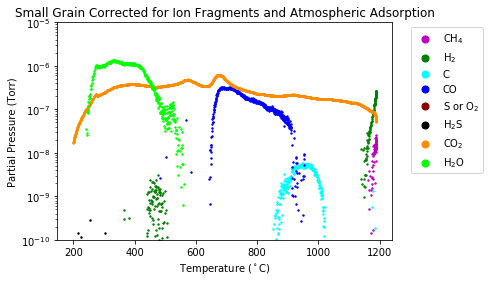

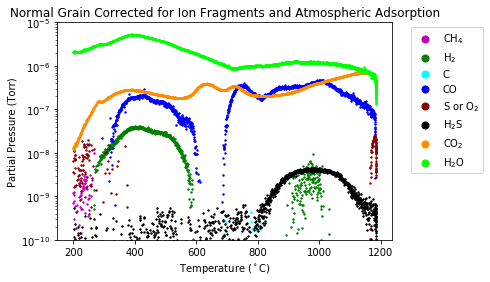

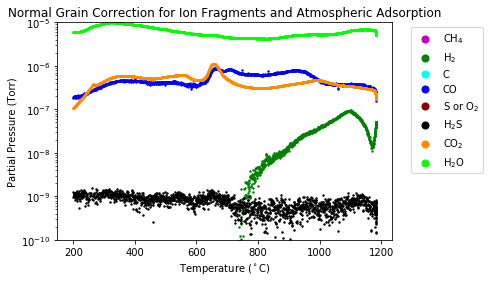

In [17]:
plotpartialP(Smallgrain_ion_atm, 'Temperature', 'Small Grain Corrected for Ion Fragments and Atmospheric Adsorption' , 'SG_ion_atm.jpg')
plotpartialP(Normalgrain_ion_atm, 'Temperature', 'Normal Grain Corrected for Ion Fragments and Atmospheric Adsorption', 'NG_ion_atm.jpg')
plotpartialP(July_ion_atm, 'Temperature', 'Normal Grain Correction for Ion Fragments and Atmospheric Adsorption', 'July_ionfrag_atm_adsorp.jpg')            